#### Goal is to predict if a customer will subscribe to a term deposit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv("term-deposit-marketing-2020.csv")
print(d.shape)
d.head()

(40000, 14)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Exploratory data analysis

In [3]:
d.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


#### Checking for null or missing values

In [4]:
d.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

#### No null or missing values are present in the data

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


#### Let's look closely at each feature

### 1. Age - age of customer

In [6]:
d.age.describe()

count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

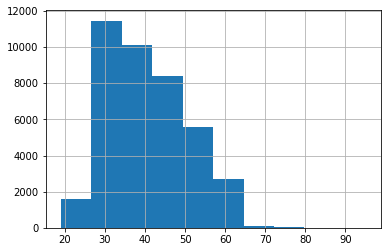

In [7]:
d.age.hist()

### Minimum age of the customer is 19 while maximum age is 95. Average age of the customer is 39. Majority of the customers fall within age range of 26-42 years 

In [8]:
d.groupby('y').mean()

,age,balance,day,duration,campaign
y,,,,,
no,40.599208,1249.752533,16.032072,221.408042,2.918688
yes,39.844959,1588.495856,15.827003,682.958564,2.414365


### The average age of customers who subscribed to the term deposit is slightly higher than that of the customers who didn’t.

### 2. Job - type of job

In [9]:
d.job.value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

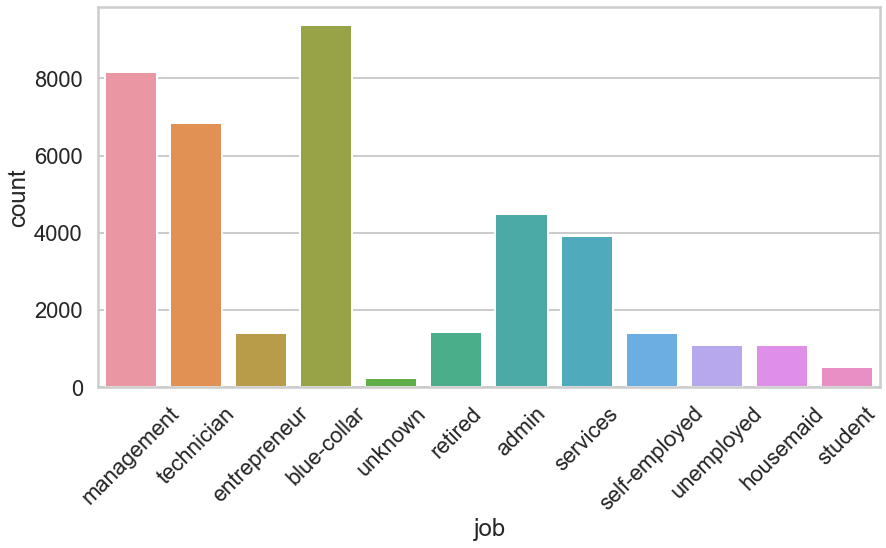

In [10]:
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(14,7))
g = sns.countplot(d['job'])
plt.xticks(rotation=45)

#### Majority of the customers that were part of the campaign were people with blue-collar jobs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

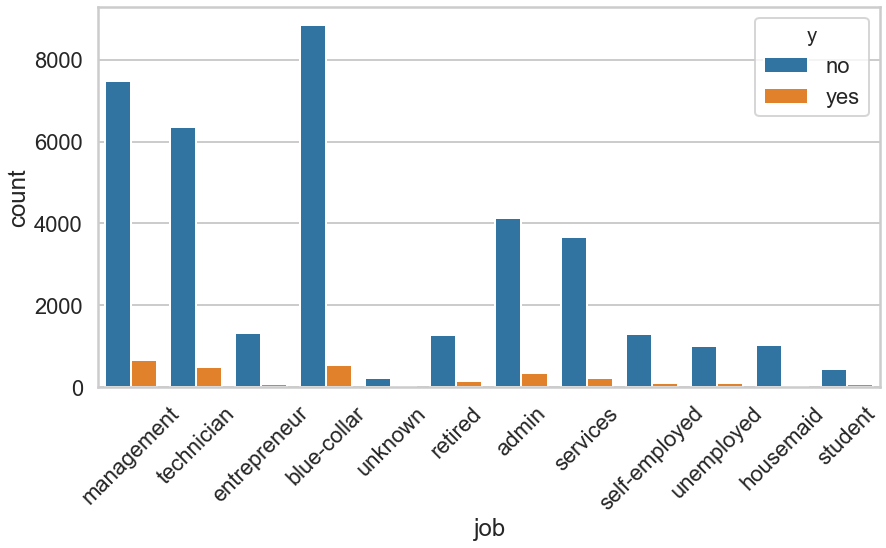

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x='job', hue='y', data=d)
plt.xticks(rotation=45)

In [12]:
#Converting y = yes/no to 0/1
d['y'] = d.y.map(dict(yes=1, no=0))

In [13]:
#Subscription rate
d.groupby('job').mean()

,age,balance,day,duration,campaign,y
job,,,,,,
admin,39.259648,1071.794111,15.810841,248.872853,2.698416,0.078296
blue-collar,40.040286,1056.803155,15.493765,262.297453,2.855057,0.057018
entrepreneur,41.957295,1452.220641,15.859786,255.159431,2.837722,0.062633
housemaid,45.443422,1327.157314,16.282429,243.590616,2.936523,0.048758
management,40.443669,1688.052902,16.450771,249.269900,3.017144,0.082782
retired,57.185108,1513.709116,15.897704,257.075157,2.649269,0.105080
self-employed,40.630835,1513.509194,16.236917,266.775813,2.959689,0.079208
services,38.868286,977.701279,15.779284,257.636573,2.779795,0.060870
student,27.561069,1288.769084,15.213740,238.671756,2.643130,0.156489


### 3. Marital - marital status

In [14]:
#Stacked bar plot marital status and y
temp1 = d[['marital', 'y']]

temp1['value']=1

import numpy as np
pivot_temp1 = pd.pivot_table(temp1, values='value', index='marital', columns='y', aggfunc=np.sum)

pivot_temp1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


y,0,1
marital,,
divorced,4334,391
married,22908,1478
single,9862,1027


Text(0.5, 0, 'Marital Status')

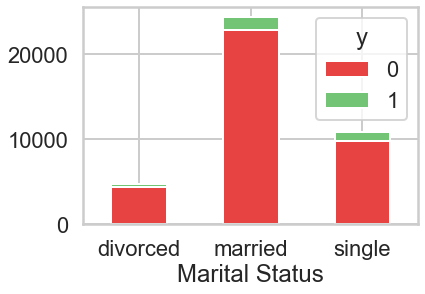

In [15]:
colors = ["#e84343","#74C476"]

pivot_temp1.plot.bar(stacked=True, color=colors)

plt.xticks(rotation=0)
plt.xlabel("Marital Status")

In [16]:
d.groupby('marital')['y'].value_counts(normalize=True)

marital   y
divorced  0    0.917249
          1    0.082751
married   0    0.939391
          1    0.060609
single    0    0.905685
          1    0.094315
Name: y, dtype: float64

### Customers whose marital status is Single seem to have higher subscription rate

### 4. Education

In [17]:
d.groupby('education')['y'].value_counts(normalize=True)

education  y
primary    0    0.943700
           1    0.056300
secondary  0    0.932454
           1    0.067546
tertiary   0    0.908174
           1    0.091826
unknown    0    0.937296
           1    0.062704
Name: y, dtype: float64

In [18]:
#Stacked bar plot marital status and y
temp2 = d[['education', 'y']]

temp2['value']=1

import numpy as np
pivot_temp2 = pd.pivot_table(temp2, values='value', index='education', columns='y', aggfunc=np.sum)

pivot_temp2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


y,0,1
education,,
primary,5917,353
secondary,19575,1418
tertiary,10177,1029
unknown,1435,96


Text(0.5, 0, 'Education')

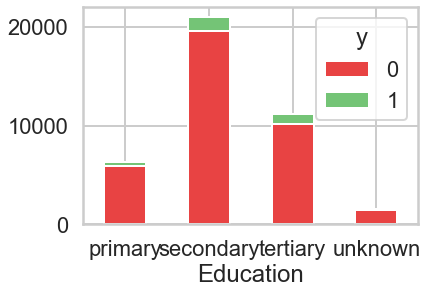

In [19]:
colors = ["#e84343","#74C476"]

pivot_temp2.plot.bar(stacked=True, color=colors)

plt.xticks(rotation=0)
plt.xlabel("Education")

### Subscription is higher for customers with tertiary education

### 5. Default - has credit in default?

In [20]:
d.groupby('default')['y'].value_counts(normalize=True)

default  y
no       0    0.927356
         1    0.072644
yes      0    0.939431
         1    0.060569
Name: y, dtype: float64

### Subcription is higher for customers who have no credit in default

### 6. Balance - average yearly balance, in euros

In [21]:
d.balance.describe()

count     40000.000000
mean       1274.277550
std        2903.769716
min       -8019.000000
25%          54.000000
50%         407.000000
75%        1319.000000
max      102127.000000
Name: balance, dtype: float64

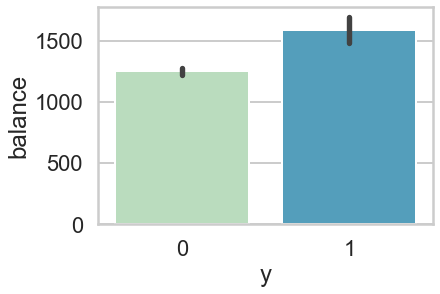

In [22]:
sns.barplot(x=d['y'], y=d['balance'], palette='GnBu')

In [23]:
d['balance'].groupby(d['y']).describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,37104.0,1249.752533,2900.722436,-8019.0,50.0,395.0,1286.0,102127.0
1,2896.0,1588.495856,2924.894429,-3058.0,141.0,620.0,1820.5,45248.0


### Customers who subscribed to the term deposit have higher balance in their account

### 7. Housing - has a housing loan?

In [24]:
d.housing.value_counts()

yes    24031
no     15969
Name: housing, dtype: int64

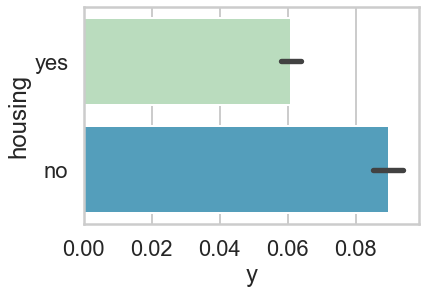

In [25]:
sns.barplot(x=d['y'], y=d['housing'], palette='GnBu')

In [26]:
#d1 = d

In [27]:
#d1['housing'] = d1['housing'].map(dict(yes=1, no=0))

In [28]:
#d1['housing'].groupby(d1['y']).describe()

In [30]:
d['housing'].groupby(d['y']).describe()

,count,unique,top,freq
y,,,,
0,37104,2,yes,22567
1,2896,2,yes,1464


### Subscription is higher for customers without housing loan

### 8. Loan -  has personal loan?

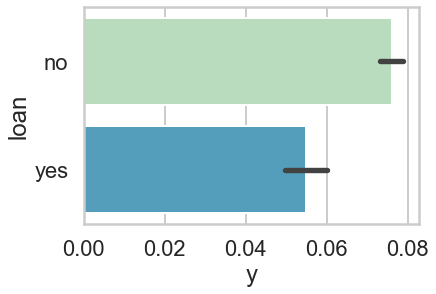

In [31]:
sns.barplot(x=d['y'], y=d['loan'], palette='GnBu')

In [32]:
d['loan'] = d['loan'].map(dict(yes=1, no=0))
d['loan'].groupby(d['y']).describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,37104.0,0.176531,0.381276,0.0,0.0,0.0,0.0,1.0
1,2896.0,0.131215,0.337694,0.0,0.0,0.0,0.0,1.0


In [45]:
d.groupby('loan')['y'].value_counts(normalize=True)

loan  y
0     0    0.923919
      1    0.076081
1     0    0.945166
      1    0.054834
Name: y, dtype: float64

### Customers with no personal loan have a slightly higher subscription rate

### 9. Contact - contact communication type 

In [33]:
d.contact.value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

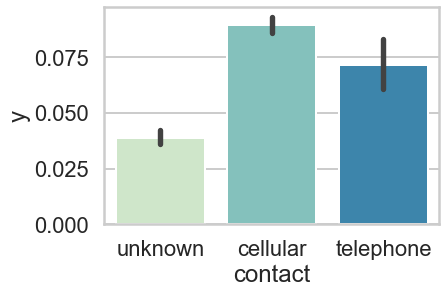

In [39]:
sns.barplot(x='contact', y='y', data = d, palette='GnBu', orient = 'v')

In [44]:
d.groupby('contact')['y'].value_counts(normalize=True)

contact    y
cellular   0    0.910372
           1    0.089628
telephone  0    0.928479
           1    0.071521
unknown    0    0.961065
           1    0.038935
Name: y, dtype: float64

### Customers who were contacted via cellular have a higher subscription rate

### Data Modeling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

In [49]:
# function for Confusion matrix, Classification Report and ROC-Curve

def classif_report(Y_test, Y_pred, pred_prob):
    print("\n", "Confusion Matrix")
    c_matrix = confusion_matrix(Y_test, Y_pred)
    ax = sns.heatmap(c_matrix, square = True,  annot=True, cbar=False, fmt = 'g', cmap="RdBu",   
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    #heatmap getting truncated so added below to extend the plot
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    custom_ylim = (b, t)
    plt.setp(ax, ylim=custom_ylim)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Accuracy: ",accuracy_score(Y_test, Y_pred))
    print("Precision Score: ", precision_score(Y_test, Y_pred))
    print("Recall Score: ", recall_score(Y_test, Y_pred))
    print("F1 Score: ", f1_score(Y_test, Y_pred))
    pred_prob_one = pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, pred_prob_one)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")

In [51]:
Y = d['y']
X = d.drop('y', axis=1)

In [52]:
#train:test = 0.85:0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21, stratify=Y)

In [53]:
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (34000, 13)
Test Data Dimensions :  (6000, 13)


In [54]:
#function to run different models

def model_data(XTr, XTe, YTr, YTe):
    
    print("\n", "Logistic Regression")
    clf_model = LogisticRegression()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)   
    
#    print("\n", "Naive Bayes")
#    clf_model = MultinomialNB()
#    clf_model.fit(XTr, YTr)
#    Y_pred = clf_model.predict(XTe)
#    pred_prob = clf_model.predict_proba(XTe)
#    classif_report(YTe, Y_pred, pred_prob)
    
    print("\n", "Decision Tree")
    clf_model = DecisionTreeClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)    
    
    print("\n", "Random Forest")
    clf_model = RandomForestClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)
    
    print("\n", "Gradient Boosting")
    clf_model = GradientBoostingClassifier()
    clf_model.fit(XTr, YTr)
    Y_pred = clf_model.predict(XTe)
    pred_prob = clf_model.predict_proba(XTe)
    classif_report(YTe, Y_pred, pred_prob)   

In [55]:
#Creating dummy variables
df_with_dummies = pd.get_dummies(data = d, drop_first=True)

In [56]:
df_with_dummies.shape

(40000, 37)

In [59]:
df_with_dummies.columns

Index(['age', 'balance', 'loan', 'day', 'duration', 'campaign', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct'],
      dtype='object')

In [60]:
#Standardizing the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_with_dummies) 
df_with_dummies.loc[:,:] = scaled_values

In [61]:
df_with_dummies.head()

,age,balance,loan,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0.513158,0.092259,0.0,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.328947,0.073067,0.0,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.184211,0.072822,1.0,0.133333,0.015453,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.368421,0.086476,0.0,0.133333,0.018707,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.184211,0.072812,0.0,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
Y = df_with_dummies['y']
X = df_with_dummies.drop('y', axis=1)
#train:test = 0.85:0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21, stratify=Y)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (34000, 36)
Test Data Dimensions :  (6000, 36)


### Applying SMOTE

In [63]:
#first separate the classes
#X_train, X_test, Y_train, Y_test

def resamplingDataPrep(X_train, Y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = Y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [64]:
#performing the upsample
#import imblearn
from imblearn.over_sampling import SMOTE
def upsample_SMOTE(X_train, Y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)
    print(len(X_train_sm), len(Y_train_sm))
    return X_train_sm, Y_train_sm

In [65]:
resamplingDataPrep(X_train, Y_train, 'y')

majority_class: 31538
minority_class: 2462


(            age   balance  loan       day  duration  campaign  \
 26368  0.250000  0.074755   0.0  0.633333  0.014233  0.000000   
 37505  0.144737  0.073766   0.0  0.400000  0.024197  0.032258   
 21511  0.368421  0.072803   0.0  0.600000  0.043310  0.016129   
 23076  0.539474  0.072803   0.0  0.833333  0.073607  0.080645   
 30504  0.250000  0.075827   0.0  0.133333  0.123221  0.016129   
 ...         ...       ...   ...       ...       ...       ...   
 28697  0.250000  0.086376   0.0  0.966667  0.068930  0.016129   
 30961  0.157895  0.073194   0.0  0.266667  0.060390  0.096774   
 32201  0.184211  0.085487   0.0  0.500000  0.075234  0.000000   
 328    0.500000  0.074674   0.0  0.133333  0.043920  0.032258   
 17140  0.092105  0.072822   1.0  0.800000  0.004473  0.241935   
 
        job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
 26368              0.0               0.0            0.0             0.0  ...   
 37505              0.0               0.0   

In [66]:
upsample_SMOTE(X_train, Y_train, ratio=1.0)

63076 63076


(            age   balance      loan       day  duration  campaign  \
 0      0.250000  0.074755  0.000000  0.633333  0.014233  0.000000   
 1      0.144737  0.073766  0.000000  0.400000  0.024197  0.032258   
 2      0.368421  0.072803  0.000000  0.600000  0.043310  0.016129   
 3      0.539474  0.072803  0.000000  0.833333  0.073607  0.080645   
 4      0.250000  0.075827  0.000000  0.133333  0.123221  0.016129   
 ...         ...       ...       ...       ...       ...       ...   
 63071  0.453225  0.074262  1.000000  0.548170  0.139121  0.030906   
 63072  0.096193  0.110341  0.000000  0.833333  0.051148  0.002349   
 63073  0.144965  0.073348  0.000000  0.933910  0.075867  0.000000   
 63074  0.530390  0.086671  0.690333  0.433333  0.216473  0.011134   
 63075  0.091821  0.084450  0.000000  0.471703  0.025338  0.016129   
 
        job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
 0                  0.0               0.0            0.0             0.0  ...

In [67]:
X_train.shape, Y_train.shape

((34000, 36), (34000,))

In [68]:
X_train_sm, Y_train_sm = upsample_SMOTE(X_train, Y_train, ratio=1.0)

63076 63076


In [69]:
X_train_sm.shape

(63076, 36)

In [70]:
Y_train_sm.value_counts()

1.0    31538
0.0    31538
Name: y, dtype: int64


 Logistic Regression


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 Confusion Matrix


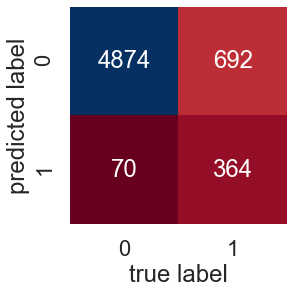


 Classification Report 

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      5566
         1.0       0.34      0.84      0.49       434

    accuracy                           0.87      6000
   macro avg       0.67      0.86      0.71      6000
weighted avg       0.94      0.87      0.90      6000

Accuracy:  0.873
Precision Score:  0.3446969696969697
Recall Score:  0.8387096774193549
F1 Score:  0.4885906040268456
AUC:  0.9286240025434211


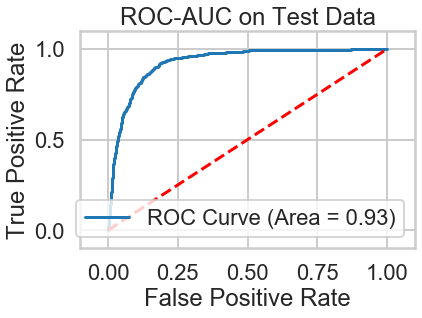

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Decision Tree

 Confusion Matrix


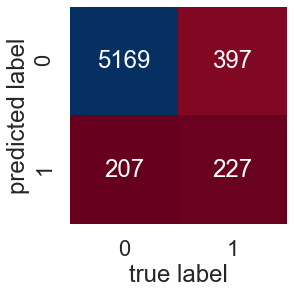


 Classification Report 

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      5566
         1.0       0.36      0.52      0.43       434

    accuracy                           0.90      6000
   macro avg       0.66      0.73      0.69      6000
weighted avg       0.92      0.90      0.91      6000

Accuracy:  0.8993333333333333
Precision Score:  0.36378205128205127
Recall Score:  0.5230414746543779
F1 Score:  0.42911153119092627
AUC:  0.7258577836800455


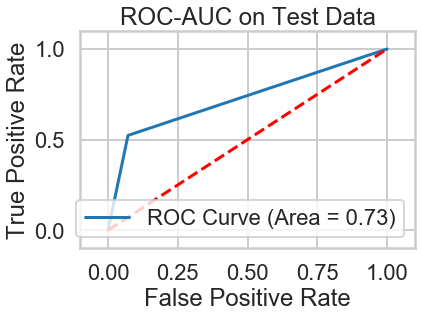

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Random Forest

 Confusion Matrix


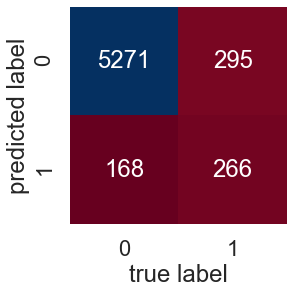


 Classification Report 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      5566
         1.0       0.47      0.61      0.53       434

    accuracy                           0.92      6000
   macro avg       0.72      0.78      0.75      6000
weighted avg       0.93      0.92      0.93      6000

Accuracy:  0.9228333333333333
Precision Score:  0.4741532976827095
Recall Score:  0.6129032258064516
F1 Score:  0.5346733668341709
AUC:  0.9397011728549406


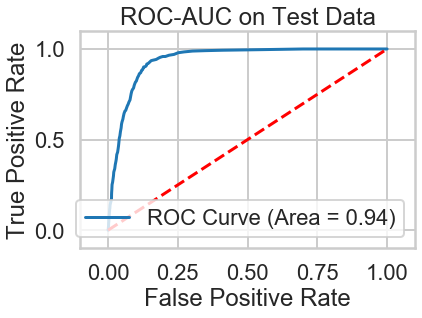

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

 Gradient Boosting

 Confusion Matrix


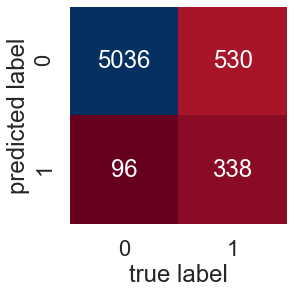


 Classification Report 

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      5566
         1.0       0.39      0.78      0.52       434

    accuracy                           0.90      6000
   macro avg       0.69      0.84      0.73      6000
weighted avg       0.94      0.90      0.91      6000

Accuracy:  0.8956666666666667
Precision Score:  0.38940092165898615
Recall Score:  0.7788018433179723
F1 Score:  0.5192012288786482
AUC:  0.9374924450788278


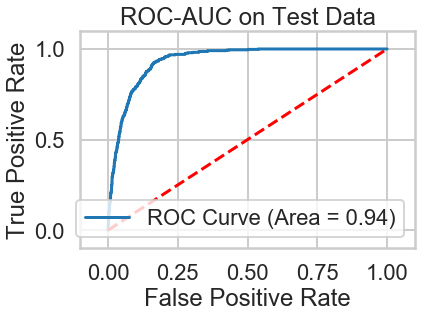

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------


In [71]:
model_data(X_train_sm, X_test, Y_train_sm, Y_test)

In [73]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

In [74]:
lr = LogisticRegression()
clf_model_lr = lr.fit(X_train_sm, Y_train_sm)
kfold = KFold(n_splits=5, random_state=25, shuffle=True)
results = cross_val_score(clf_model_lr, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross validation with Logistic Regression")
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)
       
dt = DecisionTreeClassifier()
clf_model_dt = dt.fit(X_train_sm, Y_train_sm)
kfold = KFold(n_splits=5, random_state=25, shuffle=True)
results = cross_val_score(clf_model_dt, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("\nCross validation with Decision Tree Classifier")
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)
    

rf = RandomForestClassifier()
clf_model_rf = rf.fit(X_train_sm, Y_train_sm)
kfold = KFold(n_splits=5, random_state=25, shuffle=True)
results = cross_val_score(clf_model_rf, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("\nCross validation with Random Forest Classifier")
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

gb = GradientBoostingClassifier()
clf_model_gb = gb.fit(X_train_sm, Y_train_sm)
kfold = KFold(n_splits=5, random_state=25, shuffle=True)
results = cross_val_score(clf_model_gb, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("\nCross validation with Graident Boost Classifier")
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross validation with Logistic Regression
Cross Validation Accuracy :  93.0
Cross Validation Accuracy in every fold :  [92.67 93.83 93.17 92.83 92.5 ]

Cross validation with Decision Tree Classifier
Cross Validation Accuracy :  90.0
Cross Validation Accuracy in every fold :  [89.   89.58 90.92 89.42 91.08]

Cross validation with Random Forest Classifier
Cross Validation Accuracy :  92.87
Cross Validation Accuracy in every fold :  [92.92 93.42 92.75 92.58 92.67]

Cross validation with Graident Boost Classifier
Cross Validation Accuracy :  93.33
Cross Validation Accuracy in every fold :  [93.33 93.25 94.   92.92 93.17]


#### Above are the results after creating dummy variables, standardizing features and applying SMOTE to balance target variable

In [76]:
d.corr()

,age,balance,loan,day,duration,campaign,y
age,1.000000,0.081517,0.000041,-0.011689,-0.036270,0.016204,-0.020273
balance,0.081517,1.000000,-0.080596,0.011662,0.014072,-0.008137,0.030232
loan,0.000041,-0.080596,1.000000,0.005838,-0.003952,0.000582,-0.031029
day,-0.011689,0.011662,0.005838,1.000000,-0.032983,0.165429,-0.006420
duration,-0.036270,0.014072,-0.003952,-0.032983,1.000000,-0.088387,0.461169
campaign,0.016204,-0.008137,0.000582,0.165429,-0.088387,1.000000,-0.040350
y,-0.020273,0.030232,-0.031029,-0.006420,0.461169,-0.040350,1.000000


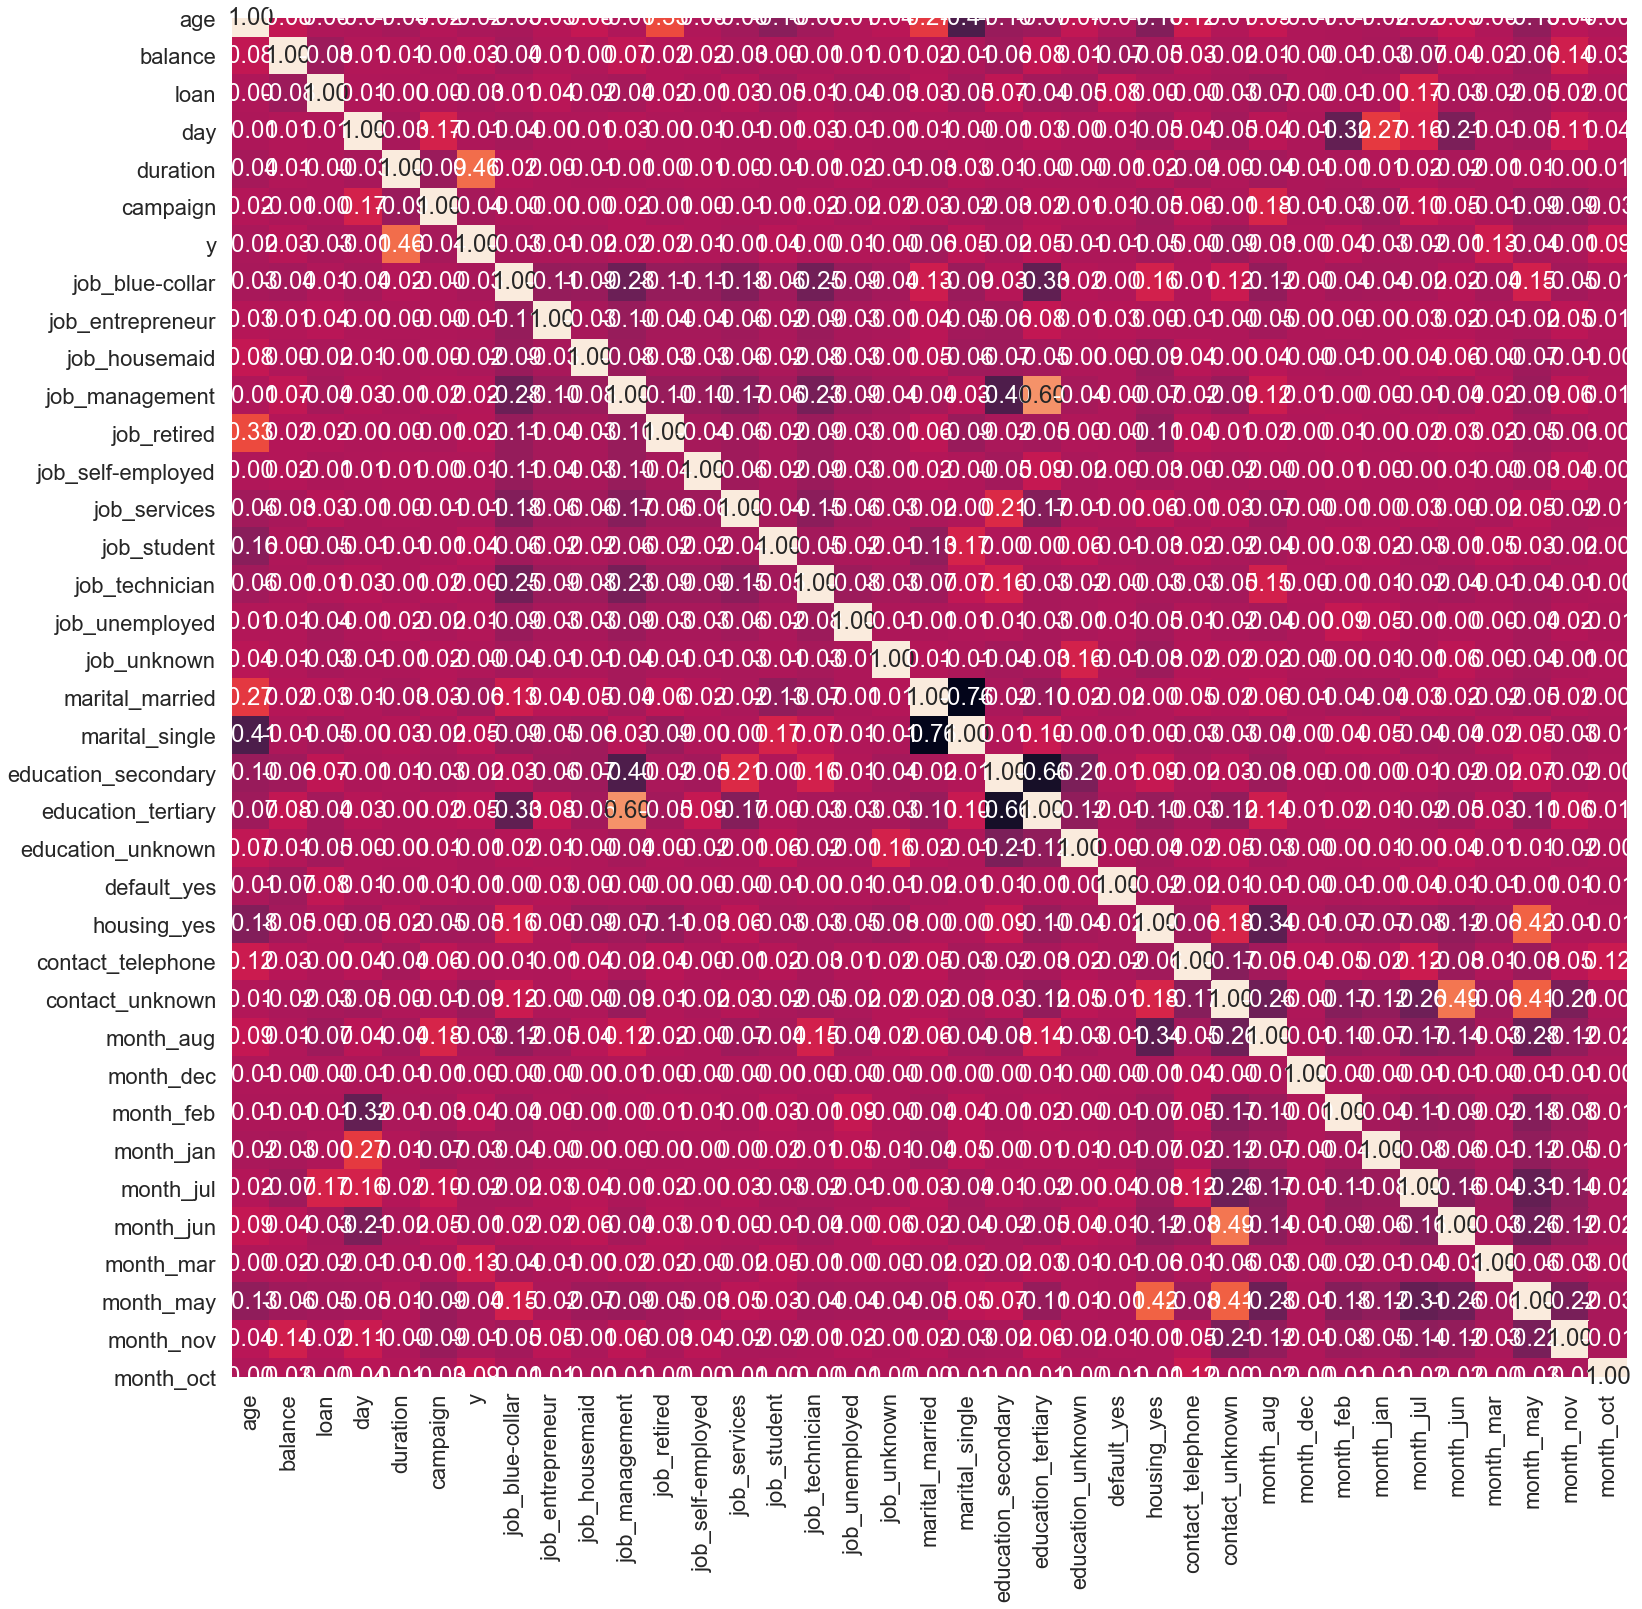

In [88]:
corrMatrix = df_with_dummies.corr()

#print(corrMatrix)

fig = plt.figure(figsize=(25,25))
fig.add_subplot(1,1,1)
sns.heatmap(corrMatrix, annot=True, fmt='.2f', cbar = False)
plt.show()

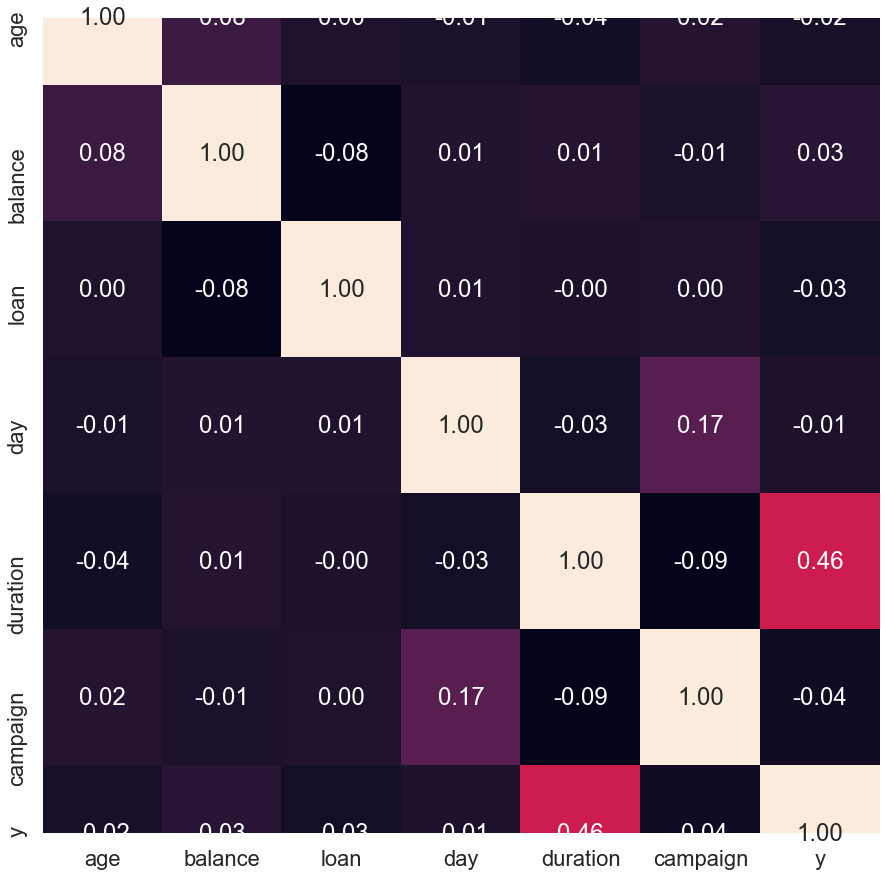

In [86]:
corrMatrix1 = d.corr()

#print(corrMatrix)

fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,1,1)
sns.heatmap(corrMatrix1, annot=True, fmt='.2f', cbar = False)
plt.show()

### Feature importance

In [90]:
clf_model_GB = GradientBoostingClassifier()
clf_model_GB.fit(X_train_sm, Y_train_sm)
Y_pred_GB = clf_model_GB.predict(X_test)

from sklearn import metrics
print("Accuracy of Gradient Boost Classifier model:",metrics.accuracy_score(Y_test, Y_pred_GB))

Accuracy of Gradient Boost Classifier model: 0.8956666666666667


In [91]:
feature_imp = pd.Series(clf_model_GB.feature_importances_,index=X.columns).sort_values(ascending=False)
#pd.options.display.max_rows = 20
print(feature_imp)

duration               0.635278
campaign               0.109637
contact_unknown        0.052925
month_mar              0.035944
housing_yes            0.032252
month_oct              0.019054
day                    0.017253
age                    0.015518
balance                0.013826
month_jul              0.013465
month_feb              0.010159
month_aug              0.008756
loan                   0.007167
month_jun              0.007162
month_jan              0.006982
marital_married        0.003478
month_nov              0.003126
contact_telephone      0.001870
education_tertiary     0.001252
job_blue-collar        0.001210
marital_single         0.000920
month_may              0.000662
education_secondary    0.000600
education_unknown      0.000597
job_housemaid          0.000318
job_entrepreneur       0.000285
default_yes            0.000180
job_unemployed         0.000090
job_technician         0.000035
month_dec              0.000000
job_management         0.000000
job_reti